---
title: "Credit Risk Prediction - Supervised Learning for Classification"
author: "Deri Siswara"
format: html
toc: true
jupyter: python3
execute:
  warning: false
  error: false
---

## Case

- You are employed as a data scientist in a risk analysis team within the financial sector.
- Your company's profit is derived from providing loans to customers.
- However, there is a risk of financial loss if customers default on their loans.
- To mitigate potential losses, it is essential to prevent high-risk applicants (who may default) from being approved for loans.
- As a data scientist, your objective is to develop a classification model to distinguish between low-risk and high-risk applicants using customer data, thereby reducing the likelihood of financial loss.

## Dataset Description

Detailed data description of Credit Risk dataset:

**Description**

| **Feature Name**             | **Description**                           |
|------------------------------|-------------------------------------------|
| `person_age`                 | Age                                       |
| `person_income`              | Annual Income                             |
| `person_home_ownership`      | Home ownership                            |
| `person_emp_length`          | Employment length (in years)              |
| `loan_intent`                | Loan intent                               |
| `loan_grade`                 | Loan grade                                |
| `loan_amnt`                  | Loan amount                               |
| `loan_int_rate`              | Interest rate                             |
| `loan_status`                | Loan status (0 is non-default, 1 is default) |
| `loan_percent_income`        | Percent income                            |
| `cb_person_default_on_file`  | Historical default                        |
| `cb_person_cred_hist_length` | Credit history length                     |

## Modeling Workflow

```
1. Import data to Python
2. Data Preprocessing
3. Training a Machine Learning Models
4. Test Prediction
5. Lets Explore
```

### 1. Import data to Python

In [1]:
# Import Numpy and Pandas library
import numpy as np
import pandas as pd

In [2]:
# Function to read the data
def read_data(fname):
    data = pd.read_csv(fname)
    print('Data shape:', data.shape)
    return data
# Read the risk data
data = read_data(fname='credit_risk_dataset.csv')

Data shape: (32581, 12)


In [3]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# Extract all columns name
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

### 2. Data Preprocessing

**The processing pipeline**
```
2.1 Input-Output Split
2.2 Train-Valid-Test Split
2.3 Remove & Preprocess Anomalous Data
2.4 Numerical Imputation
2.5 Feature Engineering the Data
2.6 Create a Preprocessing Function
```

#### 2.1. Input-Output Split

- We're going to split input & output according to the modeling objective.
- Create a function to split the input & output

In [5]:
# Function to split the data target anb features
def split_input_output(data, target_col):
    X = data.drop(columns=target_col)
    y = data[target_col]
    print('X shape:', X.shape)
    print('y shape:', y.shape)
    return X, y

In [6]:
# Load the train data only
X, y = split_input_output(data=data,
                          target_col='loan_status')

X shape: (32581, 11)
y shape: (32581,)


In [7]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4


In [8]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

#### 2.2. Train-Test Split

- Now, we want to split the data before modeling.
- Split the data into three set:
  - Train, for training the model
  - Validation, for choosing the best model
  - Test, for error generalization

- You should make the splitting proportion train (80%), valid (10%), and test (10%)

In [9]:
# Function to split the data into train and test
from sklearn.model_selection import train_test_split
def split_train_test(X, y, test_size=0.2, seed=0): # 0.2 rule of thumb
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    print('X_train shape:', X_train.shape)
    print('y_train shape:', y_train.shape)
    print('X_test shape:', X_test.shape)
    print('y_test shape:', y_test.shape)
    return X_train, X_test, y_train, y_test

In [10]:
# Split the data
# First, split the train, valid, and test
X_train, X_not, y_train, y_not = split_train_test(X, y, test_size=0.2, seed=0)
X_test, X_valid, y_test, y_valid = split_train_test(X_not, y_not, test_size=0.5, seed=0)

X_train shape: (26064, 11)
y_train shape: (26064,)
X_test shape: (6517, 11)
y_test shape: (6517,)
X_train shape: (3258, 11)
y_train shape: (3258,)
X_test shape: (3259, 11)
y_test shape: (3259,)


In [11]:
# Validate
print(len(X_train)/len(X))  # should be 0.8
print(len(X_test)/len(X))   # should be 0.1
print(len(X_valid)/len(X))  # should be 0.1

0.7999754458119763
0.09999693072649704
0.10002762346152666


The target variable relatively imbalanced.

In [12]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2162,24,30000,MORTGAGE,4.0,PERSONAL,B,5000,10.71,0.17,N,2
7670,24,54000,OWN,8.0,EDUCATION,C,1200,13.11,0.02,Y,3
24007,27,29000,RENT,2.0,PERSONAL,B,10000,12.69,0.34,N,10
25230,29,75840,OWN,5.0,HOMEIMPROVEMENT,G,25000,21.27,0.33,N,6
4897,22,39000,RENT,4.0,MEDICAL,A,5000,6.99,0.13,N,2


#### EDA before Preprocessing

- Find the number of missing values

In [13]:
# Check missing value
100 * (X_train.isna().sum(0) / len(X_train))

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.693370
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.706875
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

- We will impute all these variables if there is any missing value

- First, check the features distribution

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
# Identify numeric variables
numeric_vars = X_train.select_dtypes(include=['number']).columns.tolist()
numeric_vars

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

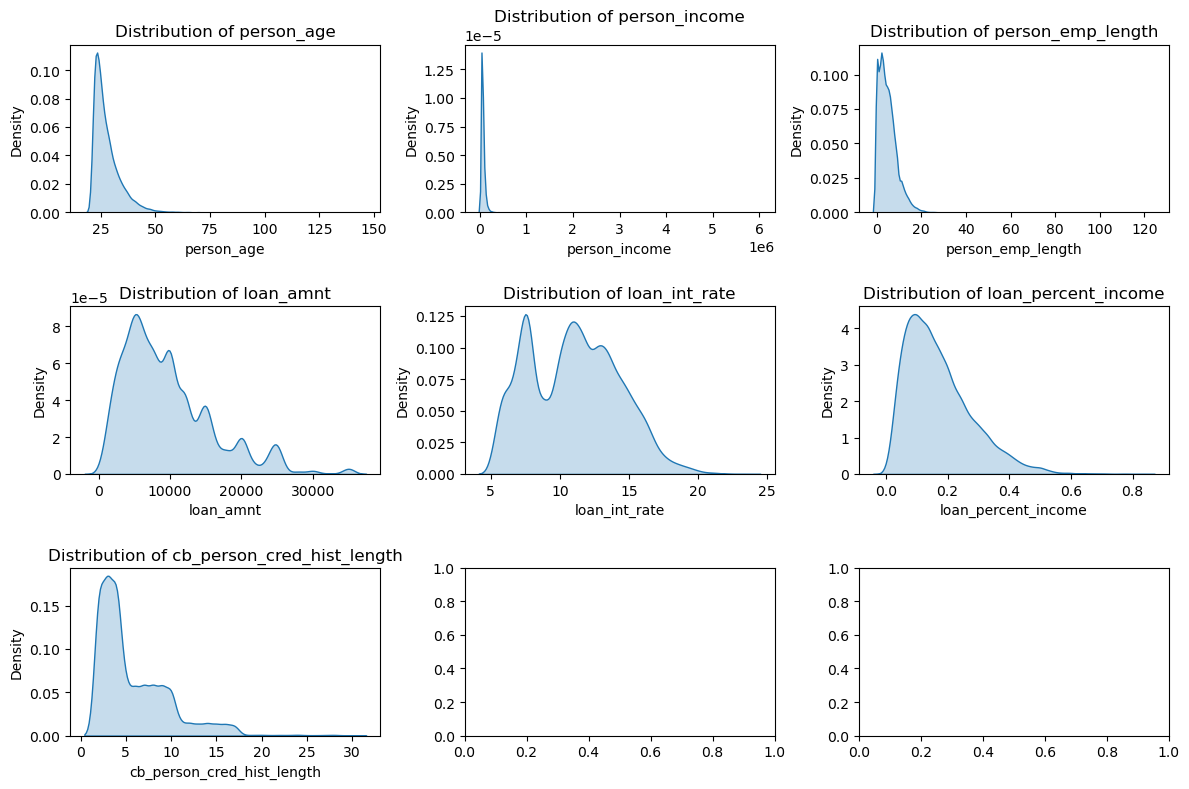

In [16]:
# Plot histogram
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = ax.flatten()

# Suppress FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Loop through each numeric variable and plot its KDE (Kernel Density Estimate)
for i, col in enumerate(X_train[numeric_vars].columns):
    sns.kdeplot(X_train[col], ax=axes[i], shade=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

Summary:

The data contains significant skewness and potential outliers, as evidenced by the KDE plots:
- The `person_emp_length`, `person_age`, `person_income`variable shows unusually high values.
- The `loan_amnt` and `loan_percent_income` distributions suggest there might be outliers or extreme values affecting the overall shape of the data.
- The presence of these anomalies indicates the need for data cleaning and preprocessing before further analysis.
- Given the skewed distribution of most numerical variables, median imputation would be a more robust approach for handling any missing values compared to mean imputation, as it is less affected by outliers.

In [17]:
# Check numerical summary
X_train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,26064.000000,2.606400e+04,25362.000000,26064.000000,23534.000000,26064.000000,26064.000000
mean,27.723181,6.631991e+04,4.808690,9596.278392,11.002234,0.170543,5.797000
std,6.308543,6.581172e+04,4.173959,6313.570925,3.238871,0.107044,4.039502
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.849900e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.905000e+04,7.000000,12250.000000,13.470000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


- Let's find the cut-off value of each features

In [18]:
# 'person_age' has outliers
X_train[X_train['person_age']>90]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0.03,N,2
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0.00,N,25
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0.02,N,3


In [19]:
# person_income has outliers
X_train[X_train['person_income']>3000000]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0.0,N,25


In [20]:
# person_emp_length has outliers
X_train[X_train['person_emp_length']>50]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0.10,N,4


In [21]:
# Identify categoric  variables
cat_vars = X_train.select_dtypes(exclude=['number']).columns.tolist()
cat_vars

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [22]:
# Loop through each column and print value counts
for col in cat_vars:
    print(f"Value counts for {col}:\n")
    print(X_train[col].value_counts())
    print("\n" + "-"*40 + "\n")

Value counts for person_home_ownership:

person_home_ownership
RENT        13158
MORTGAGE    10755
OWN          2064
OTHER          87
Name: count, dtype: int64

----------------------------------------

Value counts for loan_intent:

loan_intent
EDUCATION            5145
MEDICAL              4869
VENTURE              4556
PERSONAL             4432
DEBTCONSOLIDATION    4156
HOMEIMPROVEMENT      2906
Name: count, dtype: int64

----------------------------------------

Value counts for loan_grade:

loan_grade
A    8641
B    8347
C    5171
D    2874
E     787
F     192
G      52
Name: count, dtype: int64

----------------------------------------

Value counts for cb_person_default_on_file:

cb_person_default_on_file
N    21435
Y     4629
Name: count, dtype: int64

----------------------------------------



- Next, explore the `loan_status`

In [23]:
y_train.value_counts()

loan_status
0    20294
1     5770
Name: count, dtype: int64

- Explore the relation between features and `loan_status`

In [24]:
# Concat the data first
train_data = pd.concat((X_train, y_train), axis=1)
train_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
2162,24,30000,MORTGAGE,4.0,PERSONAL,B,5000,10.71,0.17,N,2,0
7670,24,54000,OWN,8.0,EDUCATION,C,1200,13.11,0.02,Y,3,0
24007,27,29000,RENT,2.0,PERSONAL,B,10000,12.69,0.34,N,10,1
25230,29,75840,OWN,5.0,HOMEIMPROVEMENT,G,25000,21.27,0.33,N,6,1
4897,22,39000,RENT,4.0,MEDICAL,A,5000,6.99,0.13,N,2,0


In [25]:
# Create a heatmap
# Get the correlation matrix (numeric vs numeric)
corr_matrix = train_data[numeric_vars + ['loan_status']].corr()
corr_with_loan_status = corr_matrix['loan_status'].sort_values(ascending=False)
print(corr_with_loan_status)

loan_status                   1.000000
loan_percent_income           0.381282
loan_int_rate                 0.333720
loan_amnt                     0.103017
cb_person_cred_hist_length   -0.016076
person_age                   -0.023025
person_emp_length            -0.082141
person_income                -0.140683
Name: loan_status, dtype: float64


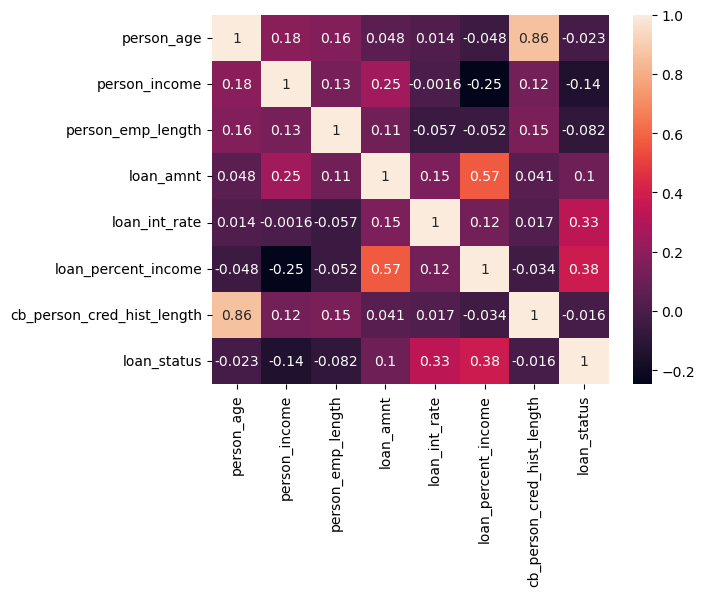

In [26]:
# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

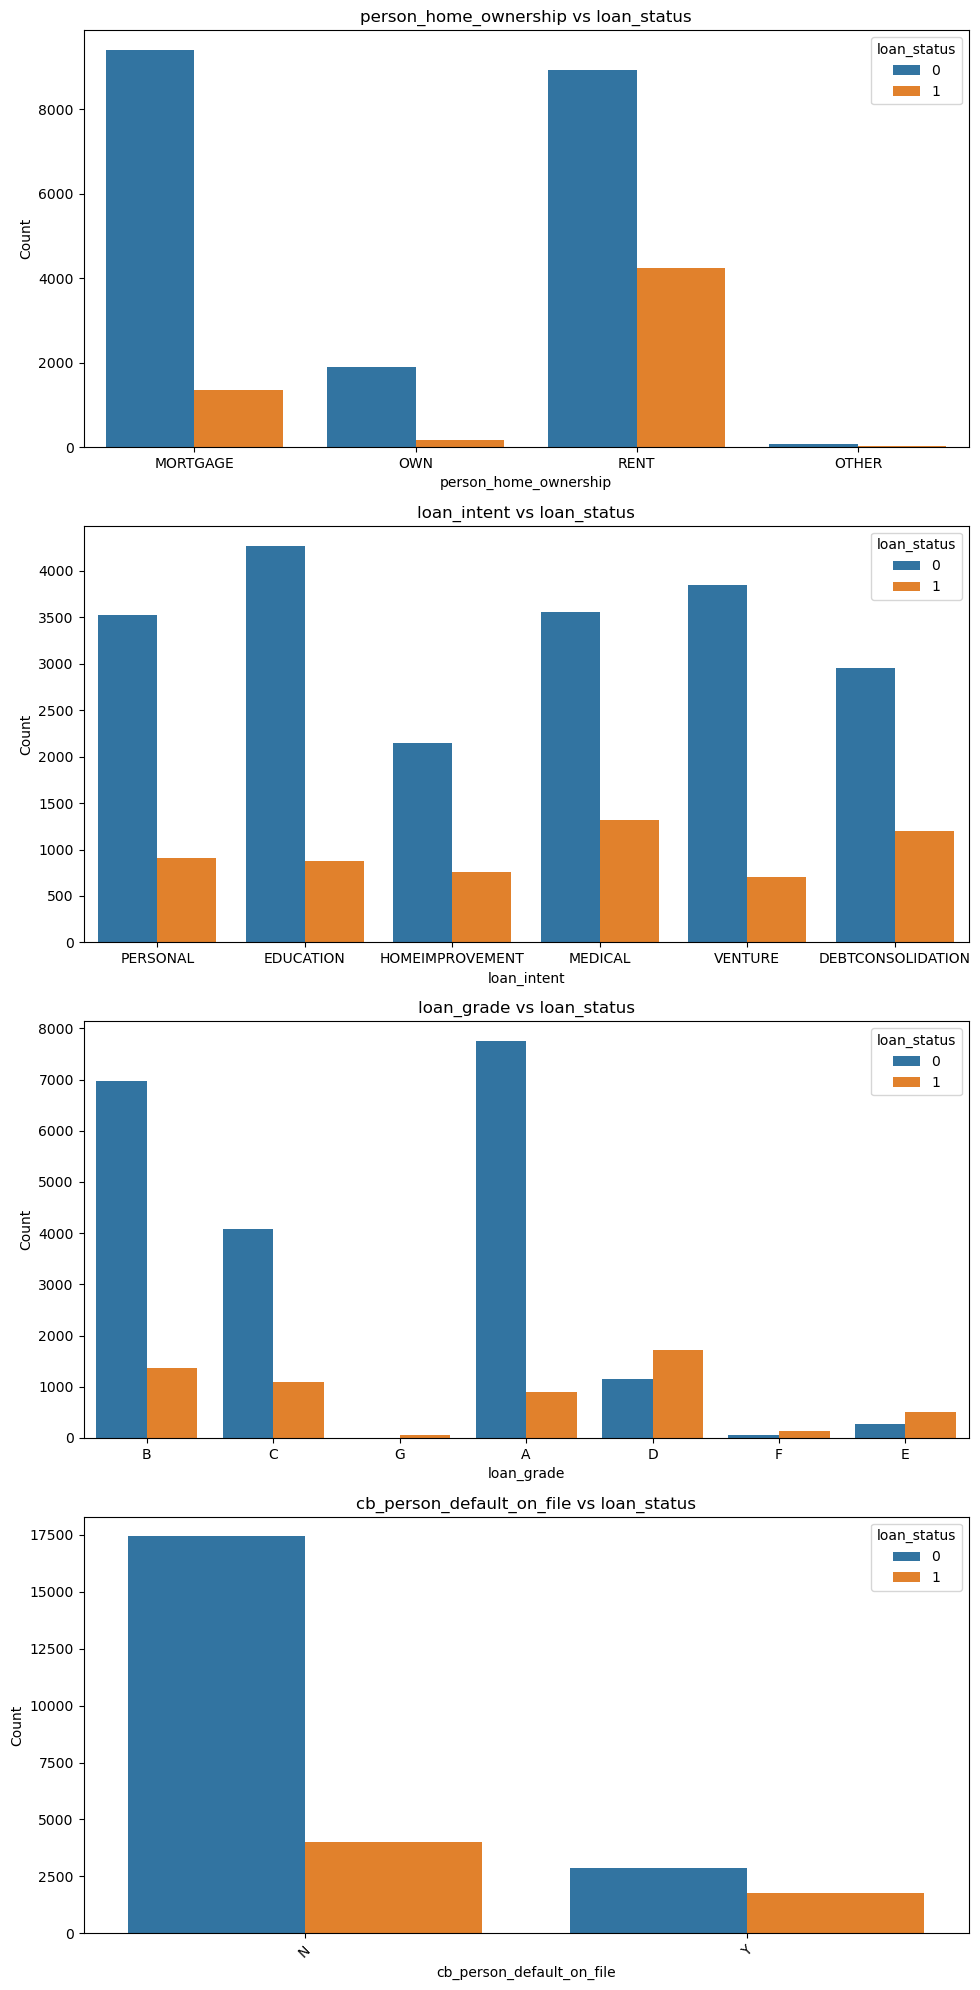

In [27]:
# Create a barplot for categorical variables vs loan_status

# Set up the figure size and layout
fig, ax = plt.subplots(nrows=len(cat_vars), ncols=1, figsize=(10, 5 * len(cat_vars)))

# Flatten ax in case there's only one categorical variable
if len(cat_vars) == 1:
    ax = [ax]

# Loop through each categorical variable and create a bar plot
for i, col in enumerate(cat_vars):
    sns.countplot(data=train_data, x=col, hue='loan_status', ax=ax[i])
    ax[i].set_title(f'{col} vs loan_status')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Count')
    ax[i].legend(title='loan_status')
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

#### 2.3. Remove & Preprocess Anomalous Data

- Let's remove our data from anomalous.
- Please see the EDA to help you remove the anomalous data

In [28]:
# Find the data indices to drop based on multiple conditions
idx_to_drop = X_train[(X_train['person_age'] > 90) | 
                      (X_train['person_income'] > 3000000) | 
                      (X_train['person_emp_length'] > 50)].index.tolist()

In [29]:
# Check the index
print(f'Number of index to drop:', len(idx_to_drop))
idx_to_drop

Number of index to drop: 5


[183, 0, 32297, 210, 81]

- Now, lets drop the data for `X_train` and also `y_train`

In [30]:
X_train_dropped = X_train.drop(index=idx_to_drop)
y_train_dropped = y_train.drop(index=idx_to_drop)

In [31]:
# Validate
print('Shape of X train after dropped:', X_train_dropped.shape)
X_train_dropped.head()

Shape of X train after dropped: (26059, 11)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2162,24,30000,MORTGAGE,4.0,PERSONAL,B,5000,10.71,0.17,N,2
7670,24,54000,OWN,8.0,EDUCATION,C,1200,13.11,0.02,Y,3
24007,27,29000,RENT,2.0,PERSONAL,B,10000,12.69,0.34,N,10
25230,29,75840,OWN,5.0,HOMEIMPROVEMENT,G,25000,21.27,0.33,N,6
4897,22,39000,RENT,4.0,MEDICAL,A,5000,6.99,0.13,N,2


In [32]:
# Validate
print('Shape of y train after dropped:', y_train_dropped.shape)
y_train_dropped.head()

Shape of y train after dropped: (26059,)


2162     0
7670     0
24007    1
25230    1
4897     0
Name: loan_status, dtype: int64

In [33]:
# Validate
X_train_dropped.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,26059.000000,2.605900e+04,25357.000000,26059.000000,23529.000000,26059.000000,26059.000000
mean,27.710273,6.607549e+04,4.799148,9595.402740,11.001991,0.170548,5.796692
std,6.184305,5.457292e+04,4.039969,6311.712618,3.238852,0.107009,4.037979
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.849600e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.900000e+04,7.000000,12250.000000,13.470000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,0.830000,30.000000


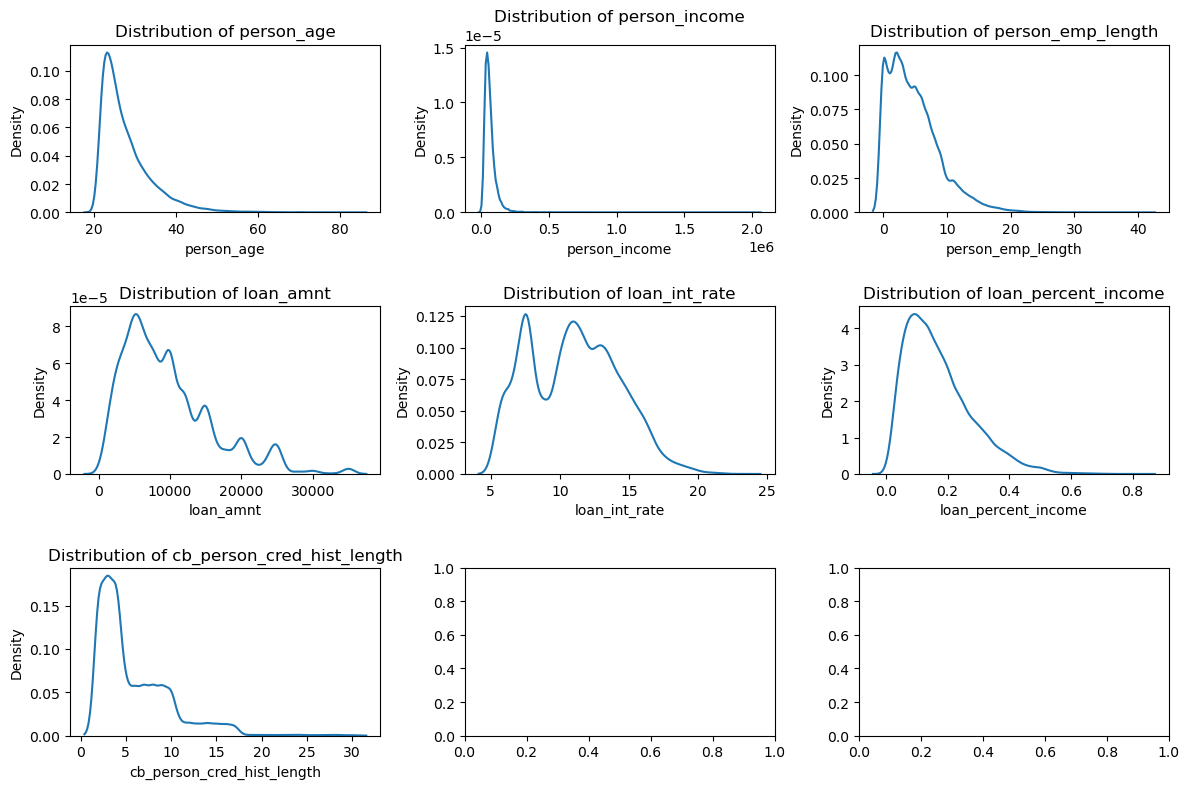

In [34]:
# Plot histogram
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = ax.flatten()

for i, col in enumerate(X_train_dropped[numeric_vars].columns):
    sns.kdeplot(X_train_dropped[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [35]:
# Create a heatmap
# Get the correlation matrix (numeric vs numeric)
corr_matrix = train_data[numeric_vars + ['loan_status']].corr()
corr_with_loan_status = corr_matrix['loan_status'].sort_values(ascending=False)
print(corr_with_loan_status)

loan_status                   1.000000
loan_percent_income           0.381282
loan_int_rate                 0.333720
loan_amnt                     0.103017
cb_person_cred_hist_length   -0.016076
person_age                   -0.023025
person_emp_length            -0.082141
person_income                -0.140683
Name: loan_status, dtype: float64


#### 2.4. Create Imputation

- Now, let's perform a numerical imputation (because all features are numerical)
- First check the missing value of the numerical data

In [36]:
# Check missing value
X_train_dropped.isna().sum(0)

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              702
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2530
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

- Create a function to fit a numerical features imputer

In [37]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

# Function to fit the KNN imputer
def num_imputer_fit(data, n_neighbors=5):
    imputer = KNNImputer(n_neighbors=n_neighbors, missing_values=np.nan)
    imputer.fit(data)
    return imputer

# Function to transform the data using the fitted KNN imputer
def num_imputer_transform(data, imputer):
    imputed_data = imputer.transform(data)
    return pd.DataFrame(imputed_data, columns=data.columns)

- Perform imputation

In [38]:
# Get the numerical imputer
num_imputer = num_imputer_fit(X_train_dropped[numeric_vars])

# Transform the data
X_train_imputed = num_imputer_transform(X_train_dropped[numeric_vars], num_imputer)

# Reset the indices
X_train_imputed = X_train_imputed.reset_index(drop=True)
X_train_dropped_cat = X_train_dropped[cat_vars].reset_index(drop=True)

# Concatenate the DataFrames
X_train_imputed = pd.concat([X_train_imputed, X_train_dropped_cat], axis=1)

In [39]:
# Validate
X_train_imputed.isna().sum(0)

person_age                    0
person_income                 0
person_emp_length             0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_cred_hist_length    0
person_home_ownership         0
loan_intent                   0
loan_grade                    0
cb_person_default_on_file     0
dtype: int64

Great!

#### 2.5. Feature engineering the data

- We standardize the data to enhance its performance during model optimization.
- We apply one-hot encoding to the data to improve its performance during model optimization.

In [40]:
# Create two functions to perform scaling & transform scaling
from sklearn.preprocessing import StandardScaler
def fit_scaler(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler
def transform_scaler(data, scaler):
    scaled_data = scaler.transform(data)
    return pd.DataFrame(scaled_data, columns=data.columns)

In [41]:
# Fit the scaler
scaler = fit_scaler(X_train_imputed[numeric_vars])

# Transform the scaler
X_train_clean =  transform_scaler(X_train_imputed[numeric_vars], scaler)
X_train_clean = pd.concat([X_train_clean, X_train_imputed[cat_vars]], axis=1)

In [42]:
X_train_clean["loan_grade"].unique()

array(['B', 'C', 'G', 'A', 'D', 'F', 'E'], dtype=object)

In [43]:
from sklearn.preprocessing import OneHotEncoder
def encode_and_one_hot(data, cat_vars, loan_grade_col='loan_grade', default_col='cb_person_default_on_file'):
    # Ordinal encoding for loan_grade
    loan_grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
    data[loan_grade_col] = data[loan_grade_col].map(loan_grade_mapping)
    
    # Convert 'Y'/'N' in cb_person_default_on_file to 1/0
    default_mapping = {'Y': 1, 'N': 0}
    data[default_col] = data[default_col].map(default_mapping)
    
    # Remove columns that are specifically encoded from cat_vars list
    cat_vars = [col for col in cat_vars if col not in [loan_grade_col, default_col]]
    
    # Apply OneHotEncoder to the specified categorical variables
    encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' to avoid multicollinearity
    encoded_data = pd.DataFrame(
        encoder.fit_transform(data[cat_vars]),
        columns=encoder.get_feature_names_out(cat_vars)
    )

    # Combine the encoded data with the original data, excluding original categorical columns
    result = pd.concat([data, encoded_data], axis=1)
    result = result.drop(cat_vars, axis=1)
    
    return result
X_train_clean = encode_and_one_hot(X_train_clean, cat_vars)

In [44]:
X_train_clean.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,cb_person_default_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
count,2.605900e+04,2.605900e+04,2.605900e+04,2.605900e+04,2.605900e+04,2.605900e+04,2.605900e+04,26059.000000,26059.000000,26059.000000,26059.000000,26059.000000,26059.000000,26059.000000,26059.000000,26059.000000,26059.000000
mean,-2.276769e-17,8.098208e-17,6.843940e-17,-2.481269e-17,2.464909e-16,7.416540e-17,4.512638e-17,2.217353,0.177597,0.003339,0.079205,0.504854,0.197398,0.111516,0.186845,0.169999,0.174757
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.167605,0.382180,0.057685,0.270063,0.499986,0.398043,0.314776,0.389795,0.375639,0.379767
min,-1.246772e+00,-1.137500e+00,-1.195040e+00,-1.441063e+00,-1.789949e+00,-1.593792e+00,-9.402636e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.616641e-01,-5.053791e-01,-6.949759e-01,-7.280894e-01,-8.600444e-01,-7.527291e-01,-6.926103e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.765558e-01,-2.029523e-01,-1.949117e-01,-2.527734e-01,-3.891071e-03,-1.920204e-01,-4.449569e-01,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.702552e-01,2.368347e-01,5.551848e-01,4.205908e-01,7.111733e-01,5.555913e-01,5.456566e-01,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.102204e+00,3.616714e+01,9.056277e+00,4.025070e+00,3.917740e+00,6.162679e+00,5.994031e+00,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
X_train_clean.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_grade', 'cb_person_default_on_file',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

#### 2.6. Create the preprocess function

- Now, let's create a function to preprocess other set of data (valid & test) so that we can predict that

In [46]:
# Create a function to preprocess the dataset
def preprocess_data(data, num_imputer, scaler, cat_vars, numeric_vars):
    
    # Step 2.4: Impute missing numerical values
    num_imputer = num_imputer_fit(data[numeric_vars])
    data_imputed = num_imputer_transform(data[numeric_vars], num_imputer)
   
    # Reset the indices
    data_imputed = data_imputed.reset_index(drop=True)
    data_cat = data[cat_vars].reset_index(drop=True)
    
    # Concatenate the DataFrames
    data_imputed = pd.concat([data_imputed, data_cat], axis=1)
    
    # Step 2.5: Scale the numerical features
    scaler = fit_scaler(data_imputed[numeric_vars])
    data_scaled = transform_scaler(data_imputed[numeric_vars], scaler)
    data_scaled = pd.concat([data_scaled, data_imputed[cat_vars]], axis=1)
    
    # Step 2.6: One-hot encode the categorical features
    clean_data = encode_and_one_hot(data_scaled, cat_vars)

    # Convert the scaled data back to DataFrame
    clean_data = pd.DataFrame(clean_data)
    
    # Output the shape of the original and cleaned data
    print(f"Original data shape: {data.shape}")
    print(f"Cleaned data shape : {clean_data.shape}")
    
    return clean_data

In [47]:
# Preprocess the data training again
X_train_clean = preprocess_data(data=X_train_dropped, num_imputer=num_imputer, scaler=scaler, cat_vars=cat_vars, numeric_vars=numeric_vars)

Original data shape: (26059, 11)
Cleaned data shape : (26059, 17)


In [48]:
# Validate
X_train_clean.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,cb_person_default_on_file,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,-0.599961,-0.661064,-0.194912,-0.728089,-0.093675,-0.005117,-0.940264,2,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.599961,-0.221277,0.805217,-1.330156,0.675901,-1.406889,-0.692610,3,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.114853,-0.679388,-0.694976,0.064104,0.541225,1.583557,1.040963,2,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.208552,0.178929,0.055120,2.440683,3.292460,1.490106,0.050350,7,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.923367,-0.496144,-0.194912,-0.728089,-1.286518,-0.378923,-0.940264,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [49]:
# Transform other set of data
X_valid_clean = preprocess_data(data=X_valid, num_imputer=num_imputer, scaler=scaler, cat_vars=cat_vars, numeric_vars=numeric_vars)
X_test_clean = preprocess_data(data=X_test, num_imputer=num_imputer, scaler=scaler, cat_vars=cat_vars, numeric_vars=numeric_vars)

Original data shape: (3259, 11)
Cleaned data shape : (3259, 17)
Original data shape: (3258, 11)
Cleaned data shape : (3258, 17)


### 3. Training Machine Learning Models

```
3.1 Prepare model evaluation function
3.2 Train & evaluate several models
3.3 Choose the best model
```

#### 3.1. Preprare model evaluation function

- Before modeling, let's prepare two functions
  - `extract_cv_results`: to return the score and best param from hyperparameter search
  - `evaluate_model`: to return the performance metrics of a model

In [50]:
# Function to evaluate the model and tuning hyperparameters

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

def extract_cv_results(cv_obj):
    best_score_train = cv_obj.cv_results_['mean_train_score'][cv_obj.best_index_]
    best_score_valid = cv_obj.cv_results_['mean_test_score'][cv_obj.best_index_]
    best_params = cv_obj.best_params_
    return best_score_train, best_score_valid, best_params

def binary_classification_metrics(y_actual, y_pred):
    accuracy = accuracy_score(y_actual, y_pred)
    f1 = f1_score(y_actual, y_pred)
    precision = precision_score(y_actual, y_pred)
    recall = recall_score(y_actual, y_pred)
    
    print(f"Classification Metrics:")
    print(f"-----------------------")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    
    return accuracy, f1, precision, recall

#### 3.2. Train and Cross Validate Several Models

In [51]:
# Import sklearn library of those six models + gridsearchcv
from sklearn.dummy import DummyClassifier
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [52]:
# Perform GridSearchCV for Baseline model
# Set up the DummyClassifier for a baseline model in a classification task
clf_base = GridSearchCV(cv=5, 
                        estimator=DummyClassifier(), 
                        param_grid={'strategy': ['most_frequent', 'stratified', 'prior', 'uniform']}, 
                        return_train_score=True, 
                        scoring='balanced_accuracy')
# Fit the baseline model
clf_base.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=5, estimator=DummyClassifier(),
             param_grid={'strategy': ['most_frequent', 'stratified', 'prior',
                                      'uniform']},
             return_train_score=True, scoring='balanced_accuracy')

In [53]:
# Validate the CV Score
train_base, valid_base, best_param_base = extract_cv_results(clf_base)

print(f'Train score - Baseline model: {train_base}')
print(f'Valid score - Baseline model: {valid_base}')
print(f'Best Params - Baseline model: {best_param_base}')

Train score - Baseline model: 0.49956010208664825
Valid score - Baseline model: 0.5019536180618739
Best Params - Baseline model: {'strategy': 'stratified'}


##### Perform CV for Logistic Regression Model

In [54]:
# Perform GridSearchCV for Logistic Regression model
param_logit = {
    'penalty': ['l1', 'l2'],  # Regularization types
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength (wider range)
    'solver': ['liblinear'],  # 'liblinear' supports both 'l1' and 'l2' penalties
    'class_weight': [None, 'balanced']  # Add class weighting for imbalanced data
}
clf_lr = GridSearchCV(cv=5, 
                      estimator=LogisticRegression(max_iter=1000), 
                      param_grid=param_logit, 
                      return_train_score=True, 
                      scoring='balanced_accuracy')
# Fit the Logistic Regression model
clf_lr.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             return_train_score=True, scoring='balanced_accuracy')

In [55]:
# Validate the CV Score
train_lr, valid_lr, best_param_lr = extract_cv_results(clf_lr)

print(f'Train score - LinReg model: {train_lr}')
print(f'Valid score - LinReg model: {valid_lr}')
print(f'Best Params - LinReg model: {best_param_lr}')

Train score - LinReg model: 0.7868440567679686
Valid score - LinReg model: 0.7859840144225727
Best Params - LinReg model: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


##### Perform CV for Decision Tree Model

In [56]:
# Perform GridSearchCV for Decision Tree model
param_dt = {
    'max_depth': [5, 10, 15, 20, None],  # More depth options
    'min_samples_split': [2, 5, 10, 20], 
    'min_samples_leaf': [1, 2, 4, 8],  # Add min_samples_leaf parameter
    'criterion': ['gini', 'entropy'],  # Try different splitting criteria
    'class_weight': [None, 'balanced']  # Add class weighting for imbalanced data
}
clf_dt = GridSearchCV(cv=5, 
                      estimator=DecisionTreeClassifier(), 
                      param_grid=param_dt, 
                      return_train_score=True, 
                      scoring='balanced_accuracy')
# Fit the Decision Tree model
clf_dt.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             return_train_score=True, scoring='balanced_accuracy')

In [57]:
# Validate the CV Score
train_dt, valid_dt, best_param_dt = extract_cv_results(clf_dt)
print(f'Train score - LinReg model: {train_dt}')
print(f'Valid score - LinReg model: {valid_dt}')
print(f'Best Params - LinReg model: {best_param_dt}')

Train score - LinReg model: 0.8992543797595026
Valid score - LinReg model: 0.856304121932123
Best Params - LinReg model: {'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10}


##### Perform CV for Random Forest Model

In [60]:
# Define parameter grid for Random Forest
param_rf = {
	'n_estimators': [100, 200],
	'max_depth': [10, None],
	'class_weight': [None, 'balanced']
}

# Perform GridSearchCV for Random Forest model
clf_rf = GridSearchCV(
    cv=5,
    estimator=RandomForestClassifier(),
    param_grid=param_rf,
    return_train_score=True,
    scoring='balanced_accuracy'  # Use balanced accuracy for scoring
)

# Fit the Random Forest model
clf_rf.fit(X_train_clean, y_train_dropped)

# Extract and print CV results
train_rf, valid_rf, best_param_rf = extract_cv_results(clf_rf)
print(f'Train score - Random Forest model: {train_rf}')
print(f'Valid score - Random Forest model: {valid_rf}')
print(f'Best Params - Random Forest model: {best_param_rf}')

Train score - Random Forest model: 1.0
Valid score - Random Forest model: 0.8593265141147377
Best Params - Random Forest model: {'class_weight': None, 'max_depth': None, 'n_estimators': 100}


##### Perform CV for XGBoost Model

In [61]:
# Define parameter grid for XGBoost
param_xgb = {
	'n_estimators': [100, 200],
	'max_depth': [3, 5, 7],
	'learning_rate': [0.01, 0.1],
	'scale_pos_weight': [1, sum(y_train_dropped == 0) / sum(y_train_dropped == 1)]
}

# Perform GridSearchCV for XGBoost model
clf_xgb = GridSearchCV(
    cv=5,
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
    param_grid=param_xgb,
    return_train_score=True,
    scoring='balanced_accuracy'  # Use balanced accuracy for scoring
)

# Fit the XGBoost model
clf_xgb.fit(X_train_clean, y_train_dropped)

# Extract and print CV results
train_xgb, valid_xgb, best_param_xgb = extract_cv_results(clf_xgb)
print(f'Train score - XGBoost model: {train_xgb}')
print(f'Valid score - XGBoost model: {valid_xgb}')
print(f'Best Params - XGBoost model: {best_param_xgb}')

c:\Users\derik\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\derik\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\derik\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\derik\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\derik\anaconda3\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\derik\anaconda3\Lib\site-packages\xgboost\sklearn.p

Train score - XGBoost model: 0.9145831986931091
Valid score - XGBoost model: 0.8793141174660957
Best Params - XGBoost model: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 3.5170740162939853}


### 4. Find best trashold for each model with data validation and best model with data test

#### 4.1. Apply best parameter to the valid data

In [62]:
import numpy as np
from sklearn.metrics import balanced_accuracy_score

# Define a function to find the best threshold that minimizes financial losses
def find_best_threshold_min_loss(y_true, y_proba, loss_per_FN, loss_per_FP, start=0.3, end=0.7, step=0.01):
    thresholds = []
    losses = []
    
    best_threshold = 0.5
    min_loss = float('inf')
    
    # Loop through thresholds from start to end in specified increments
    for threshold in np.arange(start, end + step, step):
        # Convert probabilities to binary predictions
        y_pred = (y_proba >= threshold).astype(int)
        
        # Calculate the confusion matrix components
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
        
        # Calculate financial loss due to false negatives and false positives
        loss_due_to_FN = fn * loss_per_FN
        loss_due_to_FP = fp * loss_per_FP
        
        # Calculate total financial impact
        total_financial_impact = loss_due_to_FN + loss_due_to_FP
        
        # Store threshold and loss
        thresholds.append(threshold)
        losses.append(total_financial_impact)
        
        # Update best threshold if current loss is lower
        if total_financial_impact < min_loss:
            min_loss = total_financial_impact
            best_threshold = threshold
    
    return best_threshold, min_loss, thresholds, losses

In [63]:
import pandas as pd

# Define the loss values
loss_per_FN = 35_000_000  # Rp 35,000,000 for false negatives
loss_per_FP = 10_000_000  # Rp 10,000,000 for false positives

# Collect best thresholds and minimum losses for each model
model_names = ['Baseline', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
best_thresholds = []
min_losses = []

# Baseline (DummyClassifier)
y_proba_base = clf_base.predict_proba(X_valid_clean)[:, 1]
best_threshold_base, min_loss_base, _, _ = find_best_threshold_min_loss(
    y_valid, y_proba_base, loss_per_FN, loss_per_FP, start=0.3, end=0.7
)
best_thresholds.append(best_threshold_base)
min_losses.append(min_loss_base)

# Logistic Regression
y_proba_lr = clf_lr.predict_proba(X_valid_clean)[:, 1]
best_threshold_lr, min_loss_lr, _, _ = find_best_threshold_min_loss(
    y_valid, y_proba_lr, loss_per_FN, loss_per_FP, start=0.3, end=0.7
)
best_thresholds.append(best_threshold_lr)
min_losses.append(min_loss_lr)

# Decision Tree
y_proba_dt = clf_dt.predict_proba(X_valid_clean)[:, 1]
best_threshold_dt, min_loss_dt, _, _ = find_best_threshold_min_loss(
    y_valid, y_proba_dt, loss_per_FN, loss_per_FP, start=0.3, end=0.7
)
best_thresholds.append(best_threshold_dt)
min_losses.append(min_loss_dt)

# Random Forest
y_proba_rf = clf_rf.predict_proba(X_valid_clean)[:, 1]
best_threshold_rf, min_loss_rf, _, _ = find_best_threshold_min_loss(
    y_valid, y_proba_rf, loss_per_FN, loss_per_FP, start=0.3, end=0.7
)
best_thresholds.append(best_threshold_rf)
min_losses.append(min_loss_rf)

# XGBoost
y_proba_xgb = clf_xgb.predict_proba(X_valid_clean)[:, 1]
best_threshold_xgb, min_loss_xgb, _, _ = find_best_threshold_min_loss(
    y_valid, y_proba_xgb, loss_per_FN, loss_per_FP, start=0.3, end=0.7
)
best_thresholds.append(best_threshold_xgb)
min_losses.append(min_loss_xgb)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Model': model_names,
    'Best Threshold': best_thresholds,
    'Minimum Loss': min_losses
})

# Display the summary table
print('Summary of Best Thresholds and Minimum Loss for Each Model:')
print(summary_df)

Summary of Best Thresholds and Minimum Loss for Each Model:
                 Model  Best Threshold  Minimum Loss
0             Baseline            0.30   23805000000
1  Logistic Regression            0.55   10185000000
2        Decision Tree            0.63    7860000000
3        Random Forest            0.32    7925000000
4              XGBoost            0.62    7930000000


In [64]:
from sklearn.metrics import classification_report

# Baseline (DummyClassifier)
y_proba_base = clf_base.predict_proba(X_test_clean)[:, 1]
y_pred_base = (y_proba_base >= best_threshold_base).astype(int)
report_base = classification_report(y_test, y_pred_base)
print("Classification Report for Baseline Model:")
print(report_base)

# Logistic Regression
y_proba_lr = clf_lr.predict_proba(X_test_clean)[:, 1]
y_pred_lr = (y_proba_lr >= best_threshold_lr).astype(int)
report_lr = classification_report(y_test, y_pred_lr)
print("\nClassification Report for Logistic Regression:")
print(report_lr)

# Decision Tree
y_proba_dt = clf_dt.predict_proba(X_test_clean)[:, 1]
y_pred_dt = (y_proba_dt >= best_threshold_dt).astype(int)
report_dt = classification_report(y_test, y_pred_dt)
print("\nClassification Report for Decision Tree:")
print(report_dt)

# Random Forest
y_proba_rf = clf_rf.predict_proba(X_test_clean)[:, 1]
y_pred_rf = (y_proba_rf >= best_threshold_rf).astype(int)
report_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report for Random Forest:")
print(report_rf)

# XGBoost
y_proba_xgb = clf_xgb.predict_proba(X_test_clean)[:, 1]
y_pred_xgb = (y_proba_xgb >= best_threshold_xgb).astype(int)
report_xgb = classification_report(y_test, y_pred_xgb)
print("\nClassification Report for XGBoost:")
print(report_xgb)

Classification Report for Baseline Model:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2589
           1       0.20      0.22      0.21       669

    accuracy                           0.66      3258
   macro avg       0.50      0.50      0.50      3258
weighted avg       0.67      0.66      0.66      3258


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      2589
           1       0.52      0.75      0.61       669

    accuracy                           0.80      3258
   macro avg       0.72      0.78      0.74      3258
weighted avg       0.84      0.80      0.82      3258


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2589
           1       0.68      0.75      0.71       669

    accuracy                           0.88      3

The classification reports show that all machine learning models outperform the baseline, especially in identifying defaulters (class 1). Among the models:

- **XGBoost** achieves the highest accuracy (89%) and the best balance between precision (70%) and recall (77%) for defaulters.
- **Decision Tree** and **Random Forest** also perform well, with high recall and good precision for class 1.
- **Logistic Regression** improves recall but has lower precision compared to tree-based models.
- The **Baseline** model performs poorly for defaulters.

**Conclusion:**  
XGBoost is the best model overall, providing the highest accuracy and strong performance in both precision and recall for identifying defaulters. This makes it the most effective choice for minimizing financial risk in this context.


### 5. Model Evaluation and Financial Impact

#### 5.1 Model Evaluation

My machine learning workflow involved training several models using the training set to find the best hyperparameters, tuning the threshold with validation data to minimize financial loss impact, and finally evaluating performance with test data as out-of-sample data.

Among all models tested, **XGBoost emerged as the best performer** with the following advantages:

1. **Highest Overall Accuracy (89%)**: XGBoost correctly classified 89% of all loan applications.
2. **Best Balanced Performance**: It achieved the best balance between precision (70%) and recall (77%) for identifying defaulters.
3. **Effective Hyperparameters**: The best configuration included:
   - 200 estimators (trees)
   - Maximum depth of 5
   - Learning rate of 0.1
   - Scale positive weight of 3.52 to handle class imbalance

The optimal probability threshold of 0.62 was determined to minimize financial losses, striking a balance between false positives and false negatives.

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for each model on the test set
cm_base = confusion_matrix(y_test, y_pred_base)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

print("Confusion Matrix - Baseline:\n", cm_base)
print("\nConfusion Matrix - Logistic Regression:\n", cm_lr)
print("\nConfusion Matrix - Decision Tree:\n", cm_dt)
print("\nConfusion Matrix - Random Forest:\n", cm_rf)
print("\nConfusion Matrix - XGBoost:\n", cm_xgb)

Confusion Matrix - Baseline:
 [[1991  598]
 [ 519  150]]

Confusion Matrix - Logistic Regression:
 [[2123  466]
 [ 170  499]]

Confusion Matrix - Decision Tree:
 [[2353  236]
 [ 167  502]]

Confusion Matrix - Random Forest:
 [[2280  309]
 [ 147  522]]

Confusion Matrix - XGBoost:
 [[2370  219]
 [ 155  514]]


In [68]:
# y_test table
y_test.value_counts()

loan_status
0    2589
1     669
Name: count, dtype: int64

#### 5.2 Financial Impact

**XGBoost Performance on Test Data:**

The confusion matrix for XGBoost is:

Confusion Matrix - XGBoost:  
[[2370  219]  
 [ 155  514]]

- True Negatives (TN): 2370 (Correctly identified good applicants)
- False Positives (FP): 219 (Good applicants incorrectly flagged as risky)
- False Negatives (FN): 155 (Defaulters incorrectly approved)
- True Positives (TP): 514 (Correctly identified defaulters)

**Financial Analysis:**

Given our financial assumptions:

- False Negatives cost: Rp 35,000,000 per applicant (approving bad loans)

- False Positives cost: Rp 10,000,000 per applicant (rejecting good loans)

XGBoost's financial impact:

- Loss due to False Negatives: Rp 5,425,000,000 (155 × Rp 35M)

- Loss due to False Positives: Rp 2,190,000,000 (219 × Rp 10M)

- Total Financial Impact: Rp 7,615,000,000

**Comparison with Baseline:**

- Baseline model total loss: Rp 23,805,000,000

- XGBoost total loss: Rp 7,615,000,000

- **Cost savings: Rp 16,190,000,000 (68% reduction)**

The XGBoost model significantly reduces financial losses compared to the baseline approach. The higher precision in identifying defaulters results in fewer costly false negatives, while maintaining an acceptable level of false positives.

**Business Implications:**

1. **Risk Reduction**: The model effectively identifies 77% of potential defaulters before loans are approved.

2. **Revenue Preservation**: While being cautious, the model still approves 92% of good applications, preserving most revenue opportunities.

3. **Cost-Effective Solution**: For every 1,000 applications processed, the model saves approximately Rp 5 billion compared to the baseline.

In conclusion, implementing the XGBoost model with the optimized threshold of 0.62 provides a robust solution for credit risk assessment that significantly reduces financial losses while maintaining business viability.